In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Let's start by reading in one year's worth a data to get a better feel

In [3]:
#df = pd.read_excel('/Users/andrewroberts/desktop/ga/capstone/Data/FuelMixReport_PreviousYears/IntGenByFuel2015.xls', sheet_name = ['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan'], index_col = 'Date-Fuel')

In [4]:
df = pd.read_excel('/Users/andrewroberts/desktop/ga/capstone/Data/FuelMixReport_PreviousYears/IntGenByFuel2013.xls', sheet_name = None)

In [5]:
df.keys()

dict_keys(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan'])

In [9]:
cdf = pd.concat(df,sort=False)

In [19]:
cdf

fuel          Total     00:15:00     00:30:00  \
Dec 0    12/01/13_Biomass     753.317164     8.032871     8.027288   
    1       12/01/13_Coal  313286.549667  2582.435428  2659.927757   
    2        12/01/13_Gas   23602.397053   358.731194   291.129470   
    3     12/01/13_Gas-CC  200655.371400  1536.505509  1486.354372   
    4      12/01/13_Hydro     557.146398     2.457447     2.544974   
...                   ...            ...          ...          ...   
Jan 274    01/31/13_Hydro    1421.812446     9.096735     9.115261   
    275  01/31/13_Nuclear   91040.576860   948.513307   948.540893   
    276    01/31/13_Other     364.135450     2.595820     2.591888   
    277    01/31/13_Solar     477.695823     0.000000     0.000000   
    278     01/31/13_Wind   70886.434740   513.033462   527.789517   

            00:45:00     01:00:00     01:15:00     01:30:00     01:45:00  \
Dec 0       8.034842     8.043855     8.033770     8.043053     8.040402   
    1    2664.468497  2630.011528  2641.443127  2602.311928  2611.414166   
    2     273.084451   252.120250   237.825037   239.938764   237.465545   
    3    1440.597174  1428.712029  1442.553733  1454.315659  1465.447029   
    4       2.547276     2.554181     2.539425     2.555532     2.541754   
...              ...          ...          ...          ...          ...   
Jan 274     9.104595     9.154548     9.121637     9.132588     9.151488   
    275   948.535432   948.572095   948.488970   948.451387   948.509053   
    276     2.594639     2.528905     0.423000     0.422000     0.423000   
    277     0.000000     0.000000     0.000000     0.000000     0.000000   
    278   577.083015   631.662095   674.793826   720.385888   789.541943   

            02:00:00  ...  DST2  DST3  DST4  1900-01-01 00:00:00  dst1  dst2  \
Dec 0       8.035757  ...   NaN   NaN   NaN                  NaN   NaN   NaN   
    1    2605.277921  ...   NaN   NaN   NaN                  NaN   NaN   NaN   
    2     236.758913  ...   NaN   NaN   NaN                  NaN   NaN   NaN   
    3    1471.625427  ...   NaN   NaN   NaN                  NaN   NaN   NaN   
    4       2.537479  ...   NaN   NaN   NaN                  NaN   NaN   NaN   
...              ...  ...   ...   ...   ...                  ...   ...   ...   
Jan 274     9.141158  ...   NaN   NaN   NaN                  NaN   NaN   NaN   
    275   948.658007  ...   NaN   NaN   NaN                  NaN   NaN   NaN   
    276     0.426000  ...   NaN   NaN   NaN                  NaN   NaN   NaN   
    277     0.000000  ...   NaN   NaN   NaN                  NaN   NaN   NaN   
    278   842.590562  ...   NaN   NaN   NaN                  NaN   NaN   NaN   

         dst3  dst4      Date     Fuel  
Dec 0     NaN   NaN  12/01/13  Biomass  
    1     NaN   NaN  12/01/13     Coal  
    2     NaN   NaN  12/01/13      Gas  
    3     NaN   NaN  12/01/13   Gas-CC  
    4     NaN   NaN  12/01/13    Hydro  
...       ...   ...       ...      ...  
Jan 274   NaN   NaN  01/31/13    Hydro  
    275   NaN   NaN  01/31/13  Nuclear  
    276   NaN   NaN  01/31/13    Other  
    277   NaN   NaN  01/31/13    Solar  
    278   NaN   NaN  01/31/13     Wind  

[3285 rows x 109 columns]

In [20]:
cdf.rename(columns = {'Date-Fuel': 'fuel'}, inplace=True)

cdf[['Date', 'Fuel']] = cdf.fuel.str.split("_", expand=True)

In [21]:
full_df = cdf[['Date', 'Fuel', 'Total']]

In [22]:
full_df

Date     Fuel          Total
Dec 0    12/01/13  Biomass     753.317164
    1    12/01/13     Coal  313286.549667
    2    12/01/13      Gas   23602.397053
    3    12/01/13   Gas-CC  200655.371400
    4    12/01/13    Hydro     557.146398
...           ...      ...            ...
Jan 274  01/31/13    Hydro    1421.812446
    275  01/31/13  Nuclear   91040.576860
    276  01/31/13    Other     364.135450
    277  01/31/13    Solar     477.695823
    278  01/31/13     Wind   70886.434740

[3285 rows x 3 columns]

In [23]:
# https://stackoverflow.com/questions/66792082/pandas-python-how-to-transpose-duplicate-rows-to-columns-and-preserve-order
order = full_df['Date'].unique()
full_df = full_df.set_index([full_df.groupby('Fuel').cumcount(), 'Fuel'])['Total'].unstack()

In [24]:
# https://datascience.stackexchange.com/questions/48335/how-to-add-date-column-in-python-pandas-dataframe
full_df['date'] = pd.date_range(start='2013-01-01', periods=len(full_df), freq='D')

In [25]:
full_df

Fuel,Biomass,Coal,Gas,Gas-CC,Hydro,Nuclear,Other,Solar,Wind,date
0,753.317164,313286.549667,23602.397053,200655.371400,557.146398,91122.231145,1469.331733,380.690845,66546.772675,2013-01-01
1,721.656994,317173.745389,24765.039260,250271.660600,670.338438,91119.983378,1399.076492,534.768042,75279.818054,2013-01-02
2,718.798318,320656.094650,17866.231603,221609.752312,502.669411,91094.525228,924.151970,549.141522,125528.347402,2013-01-03
3,1881.851295,293800.058038,21754.571947,253390.318714,331.784705,90688.600789,483.282115,274.106742,114839.880966,2013-01-04
4,2399.834084,317058.003295,45513.580494,335295.668691,388.433045,91241.167395,499.093751,129.052795,121809.028976,2013-01-05
...,...,...,...,...,...,...,...,...,...,...
360,861.657001,278702.780600,12039.171380,157765.871900,1325.244632,90993.968400,500.150184,184.439622,151789.403700,2013-12-27
361,781.923171,276410.680800,12187.203490,206804.310100,1259.935564,90947.255120,499.289113,97.491342,167278.332200,2013-12-28
362,952.090621,276024.928400,14221.557420,208257.943000,1281.224316,91026.068250,398.800388,217.375656,169479.903200,2013-12-29
363,876.276025,271531.344700,13488.600480,264414.235800,1302.350042,91054.460400,370.745320,517.904208,128863.382100,2013-12-30


In [26]:
full_df = full_df.set_index('date')


In [27]:
full_df

Fuel,Biomass,Coal,Gas,Gas-CC,Hydro,Nuclear,Other,Solar,Wind
date,,,,,,,,,
2013-01-01,753.317164,313286.549667,23602.397053,200655.371400,557.146398,91122.231145,1469.331733,380.690845,66546.772675
2013-01-02,721.656994,317173.745389,24765.039260,250271.660600,670.338438,91119.983378,1399.076492,534.768042,75279.818054
2013-01-03,718.798318,320656.094650,17866.231603,221609.752312,502.669411,91094.525228,924.151970,549.141522,125528.347402
2013-01-04,1881.851295,293800.058038,21754.571947,253390.318714,331.784705,90688.600789,483.282115,274.106742,114839.880966
2013-01-05,2399.834084,317058.003295,45513.580494,335295.668691,388.433045,91241.167395,499.093751,129.052795,121809.028976
...,...,...,...,...,...,...,...,...,...
2013-12-27,861.657001,278702.780600,12039.171380,157765.871900,1325.244632,90993.968400,500.150184,184.439622,151789.403700
2013-12-28,781.923171,276410.680800,12187.203490,206804.310100,1259.935564,90947.255120,499.289113,97.491342,167278.332200
2013-12-29,952.090621,276024.928400,14221.557420,208257.943000,1281.224316,91026.068250,398.800388,217.375656,169479.903200


### Let's combine 'Gas' & 'Gas-CC' as one column - 'NGas' for natural gas

In [29]:
full_df['NGas'] = full_df['Gas'] + full_df['Gas-CC']
full_df.drop(columns = ['Gas', 'Gas-CC'], inplace = True)

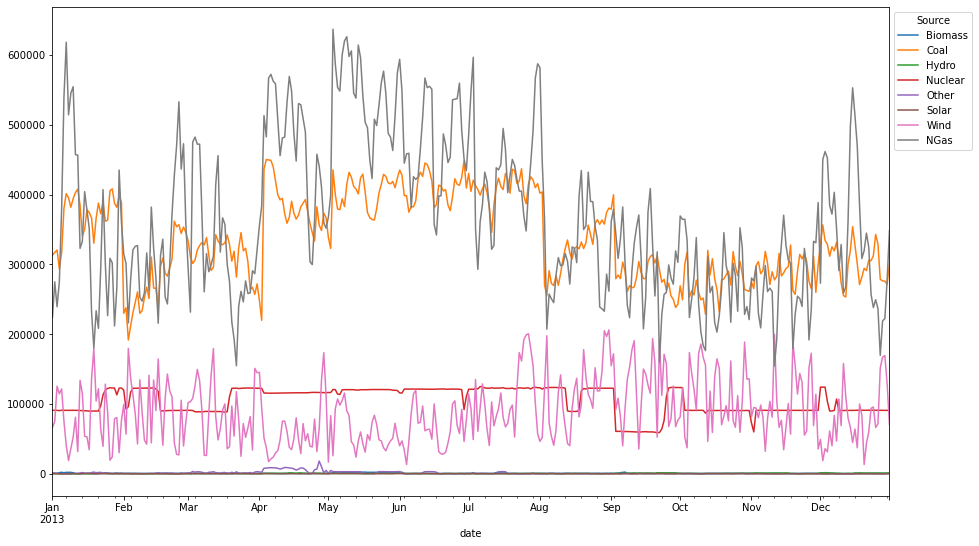

In [31]:
full_df.plot(figsize=(15,9)).legend(title='Source', bbox_to_anchor=(1, 1));


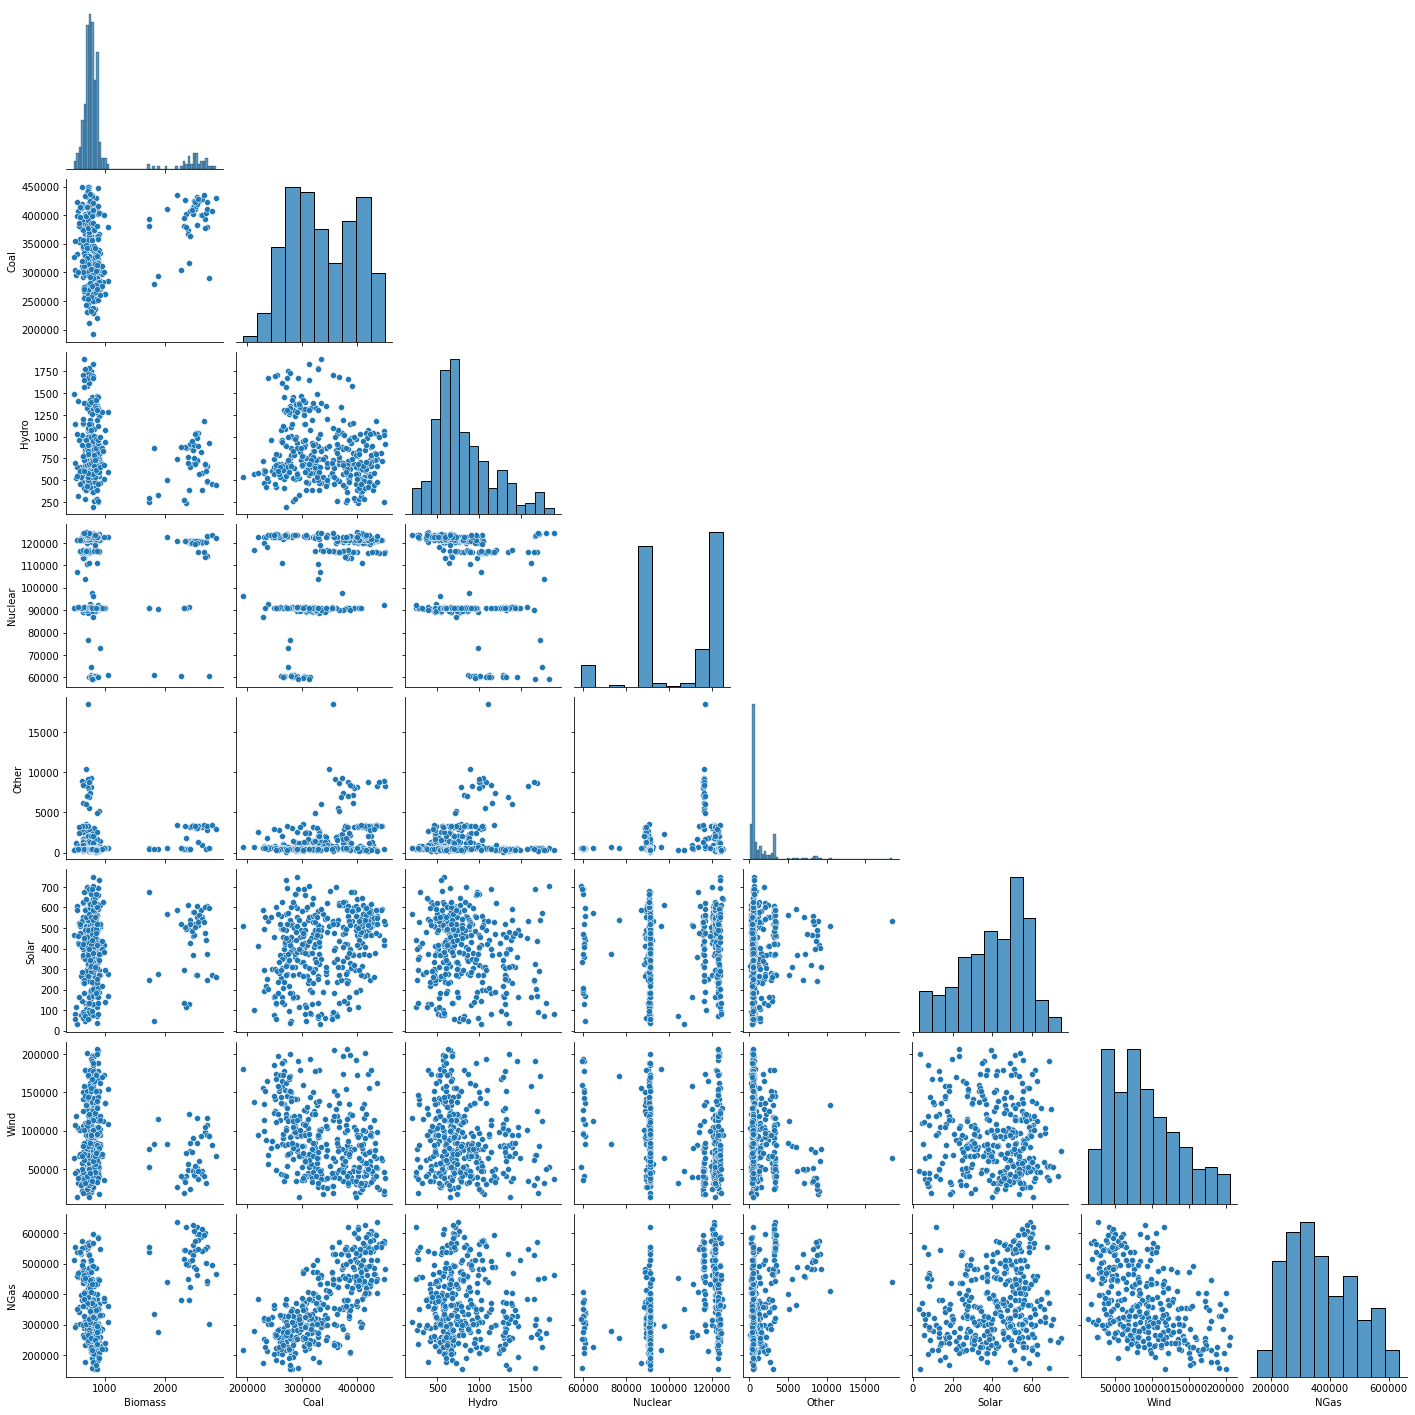

In [32]:
sns.pairplot(full_df, corner=True)

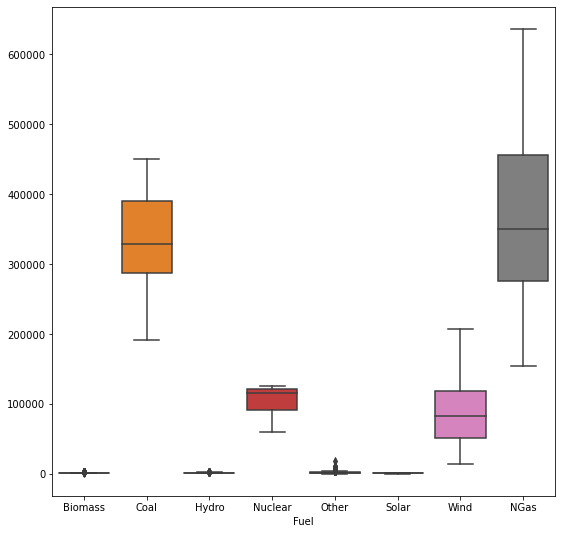

In [33]:
plt.figure(figsize=(9,9))
sns.boxplot(data = full_df,
            
            );


### Export the cleaned data

In [34]:
full_df.to_csv('../data/final_dfs/2013_clean.csv')